In [1]:
%tensorflow_version 2.x 

TensorFlow 2.x selected.


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


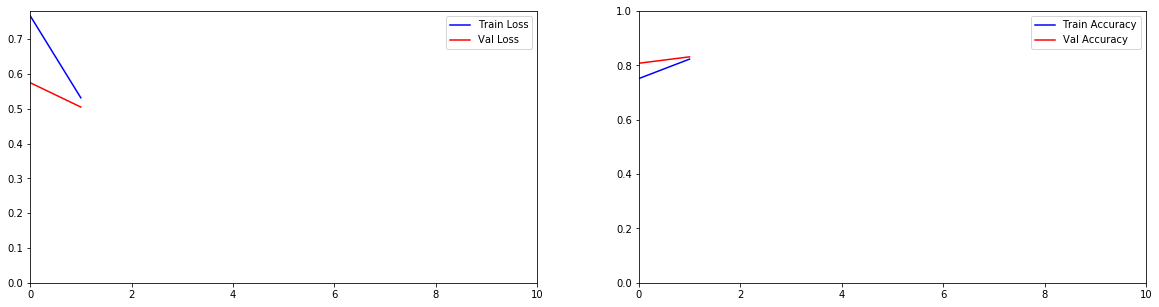

Loss: 0.7677282446225484 , Accuracy: 0.751375 , Validation Loss: 0.5750054947535197 , Validation Accuracy 0.80775


Loss: 0.5315390472412109 , Accuracy: 0.8230208 , Validation Loss: 0.5049656070868174 , Validation Accuracy 0.83133334


KeyError: ignored

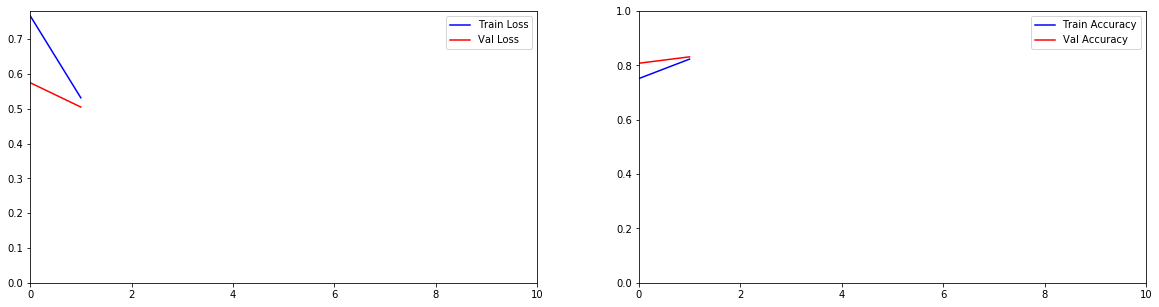

In [4]:
from tensorflow import keras
import tensorflow as tf
from tqdm import tqdm_notebook as tqdm
from IPython.display import display
import matplotlib.pyplot as plt

class ProgressCallback(keras.callbacks.Callback):
  def __init__(self, m, epochs, batchSize, valSplit, leavePlots=True, plot=False):
    self.plot = plot
    self.leavePlots = leavePlots
    self.epochs = epochs
    self.trainSize = int(m * (1 - valSplit))
    self.valSize = int(m * valSplit)
    self.batchSize = batchSize
    self.completed = 0
    self.trainErrors, self.valErrors, self.trainAcc, self.valAcc = [],[],[],[]
    if self.plot:
      self.fig, (self.axLoss, self.axAcc) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
      self.ide = display(self.axLoss.figure, display_id=True)

  def on_train_begin(self, logs=None):
    self.initialProgbar = tqdm(total=self.epochs, desc = "Epochs Completed... ", position = 1)

  def on_train_batch_end(self, batch, logs=None):
    self.progbar.update(1)

  def on_epoch_begin(self, epoch, logs=None):
    self.progbar = tqdm(total = self.trainSize/self.batchSize, position = 0, leave = self.leavePlots)
    self.progbar.set_description("Epoch {}, Training... ".format(epoch))

  def on_epoch_end(self, epoch, logs=None):
    self.initialProgbar.update(1)
    self.progbar.close()
    print("Loss:", logs['loss'], ", Accuracy:", logs['accuracy'], ", Validation Loss:", logs['val_loss'], ", Validation Accuracy", logs['val_accuracy'])
    self.trainErrors.append(logs['loss'])
    self.valErrors.append(logs['val_loss'])
    self.trainAcc.append(logs['accuracy'])
    self.valAcc.append(logs['val_accuracy'])

    if self.plot:
      self.axLoss.cla()
      self.axLoss.plot(list(range(len(self.trainErrors))), self.trainErrors, label="Train Loss", color='blue')
      self.axLoss.plot(list(range(len(self.valErrors))), self.valErrors, label="Val Loss", color='red')
      self.axLoss.legend()

      self.axAcc.cla()
      self.axAcc.plot(list(range(len(self.trainAcc))), self.trainAcc, label="Train Accuracy", color='blue')
      self.axAcc.plot(list(range(len(self.valAcc))), self.valAcc, label="Val Accuracy", color='red')
      self.axAcc.legend()

      self.axAcc.set_ylim(ymin=0, ymax=1)
      self.axAcc.set_xlim(xmin=0, xmax=self.epochs)
      self.axLoss.set_xlim(xmin=0, xmax=self.epochs)
      self.axLoss.set_ylim(ymin=0)

      self.ide.update(self.axLoss.figure)

DIM = 28
EPOCHS = 10

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], DIM, DIM, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], DIM, DIM, 1).astype('float32') / 255

# Very basic model to speed up training
def modelKeras(input_shape):
  inp = keras.layers.Input(input_shape)
  image = keras.layers.Flatten()(inp)
  image = keras.layers.Dense(10, activation = 'softmax')(image)
  model = keras.Model(inputs = inp, outputs = image)
  return model

kerasModel = modelKeras((28, 28, 1))
kerasModel.summary()

cb = ProgressCallback(x_train.shape[0], epochs=EPOCHS, valSplit = 0.2, batchSize=128)

kerasModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
kerasModel.fit(x_train, y_train, epochs = EPOCHS, validation_split = 0.2, batch_size = 128, shuffle=True, callbacks=[cb], verbose=0)